/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_37036/123584013.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=symbol, period="60d", interval="5m")
[*********************100%***********************]  1 of 1 completed

Price                            Close         High          Low         Open  \
Datetime                                                                        
2025-04-11 03:45:00+00:00  3219.000000  3284.050049  3218.000000  3284.050049   
2025-04-11 03:50:00+00:00  3233.649902  3234.449951  3211.100098  3221.399902   
2025-04-11 03:55:00+00:00  3233.449951  3235.000000  3225.000000  3234.000000   
2025-04-11 04:00:00+00:00  3249.000000  3250.000000  3230.300049  3233.800049   
2025-04-11 04:05:00+00:00  3260.350098  3264.949951  3250.149902  3250.149902   

Price                      Volume  
Datetime                           
2025-04-11 03:45:00+00:00       0  
2025-04-11 03:50:00+00:00  360761  
2025-04-11 03:55:00+00:00  268423  
2025-04-11 04:00:00+00:00  241188  
2025-04-11 04:05:00+00:00  243939  


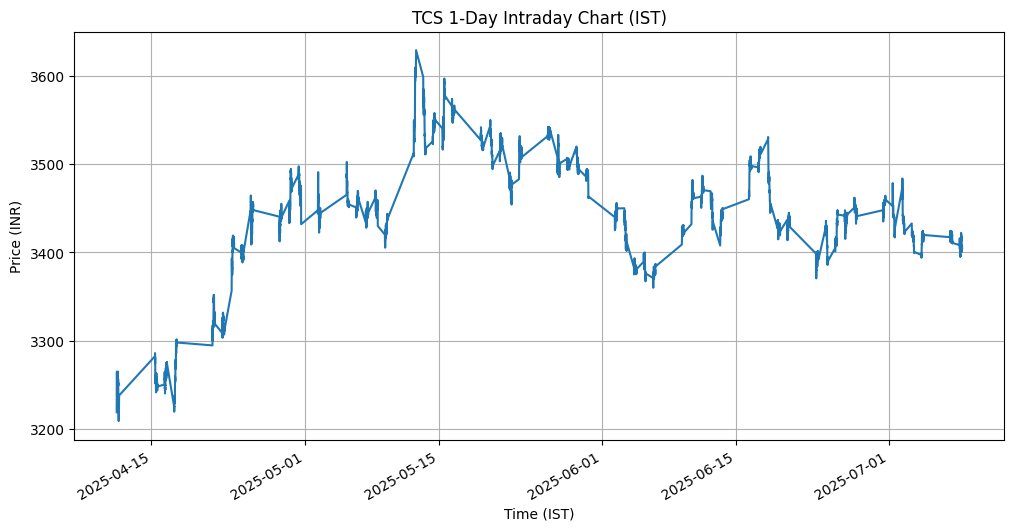

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define ticker
symbol = "TCS.NS"

# Download 120-day, 5-minute intraday data
data = yf.download(tickers=symbol, period="60d", interval="5m")
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)
print(data.head())
# If index is already timezone-aware, directly convert to IST
data.index = data.index.tz_convert("Asia/Kolkata")
data.to_csv("tcs_intraday.csv")

# Display data
# print(data.head())

# Plotting
data['Close'].plot(figsize=(12, 6), title="TCS 1-Day Intraday Chart (IST)", ylabel="Price (INR)")
plt.xlabel("Time (IST)")
plt.grid()
plt.show()


# Linear regression analysis

/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_37150/2391732747.py:18: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="60d", interval="5m", progress=False)


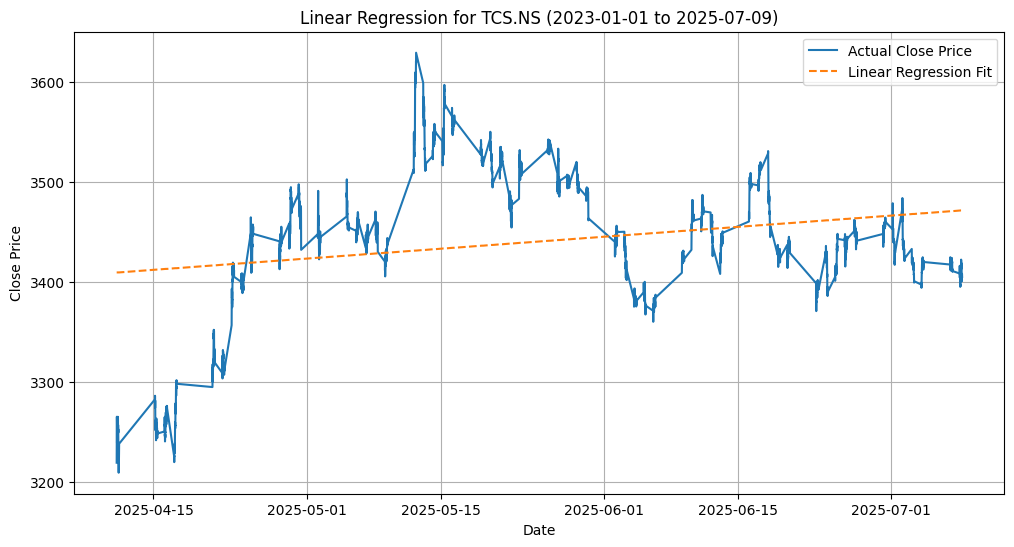

Model: price ≈ 0.7046×date_ordinal + -517529.70


In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from datetime import datetime

def predict_and_plot_linear(ticker, start_date=None, end_date=None):
    """
    Download Close prices for `ticker` between start_date/end_date,
    fit a LinearRegression on date→price, plot actual vs fitted,
    and print the regression equation.
    """
    if end_date is None:
        end_date = datetime.today().strftime("%Y-%m-%d")

    # 1) Download
    df = yf.download(ticker, period="60d", interval="5m", progress=False)
    df = df[['Close']].dropna()

    # 2) Feature = date ordinal
    df['DateOrdinal'] = df.index.map(datetime.toordinal)
    X = df['DateOrdinal'].values.reshape(-1, 1)
    y = df['Close'].values.reshape(-1, 1)  # make it (n,1) to avoid multioutput quirks

    # 3) Fit
    model = LinearRegression()
    model.fit(X, y)

    # 4) Predict
    y_pred = model.predict(X).flatten()
    actual = y.flatten()

    # 5) Extract scalar slope & intercept
    slope = float(model.coef_.ravel()[0])
    intercept = float(model.intercept_.ravel()[0])

    # 6) Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, actual, label='Actual Close Price')
    plt.plot(df.index, y_pred, '--', label='Linear Regression Fit')
    plt.title(f'Linear Regression for {ticker} ({start_date} to {end_date})')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 7) Print equation
    print(f"Model: price ≈ {slope:.4f}×date_ordinal + {intercept:.2f}")

if __name__ == "__main__":
    # Example: call with just ticker
    predict_and_plot_linear("TCS.NS", start_date="2023-01-01")


# LSTM

In [7]:
pip install yfinance pandas numpy scikit-learn tensorflow matplotlib


  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.6/252.6 MB 12.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 12.7 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.4/671.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.8 MB/s eta 0:00:00a 0:00:01
Using cached wheel-0.45.1-py3-none-any.whl (72 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_37150/2024650009.py:21: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)


Epoch 1/20


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1328 - val_loss: 6.0374e-04
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 8.6367e-04 - val_loss: 5.3543e-04
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 6.9203e-04 - val_loss: 5.1595e-04
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6207e-04 - val_loss: 4.5774e-04
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 5.6176e-04 - val_loss: 5.4360e-04
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.6890e-04 - val_loss: 3.0803e-04
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.4270e-04 - val_loss: 3.0412e-04
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 4.0043e-04 - val_loss: 2.9723e-04
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.8805e-04 - val_loss: 3.2920e-04
Epoch 10/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 4.3668e-04 - val_loss: 2.5681e-04
Epoch 11/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.3796e-04 - 

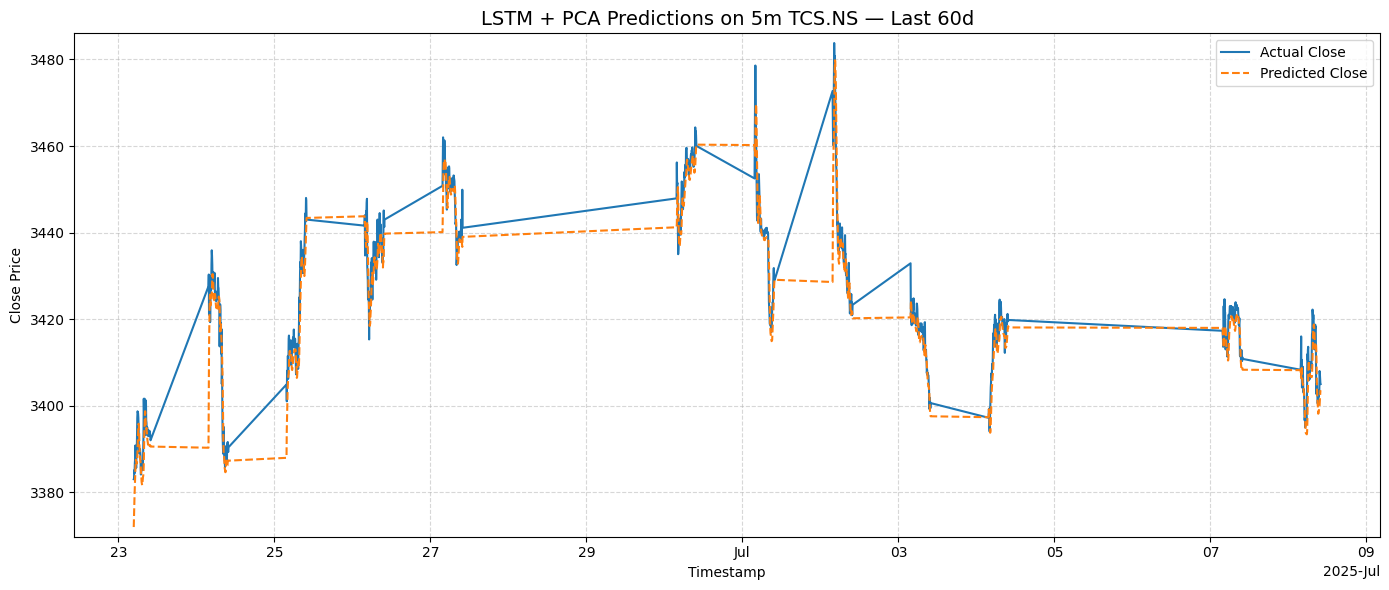

                                Actual    Predicted
Datetime                                           
2025-07-08 09:35:00+00:00  3408.000000  3399.993896
2025-07-08 09:40:00+00:00  3407.500000  3401.139648
2025-07-08 09:45:00+00:00  3406.500000  3402.477783
2025-07-08 09:50:00+00:00  3405.199951  3403.414307
2025-07-08 09:55:00+00:00  3405.000000  3403.572998


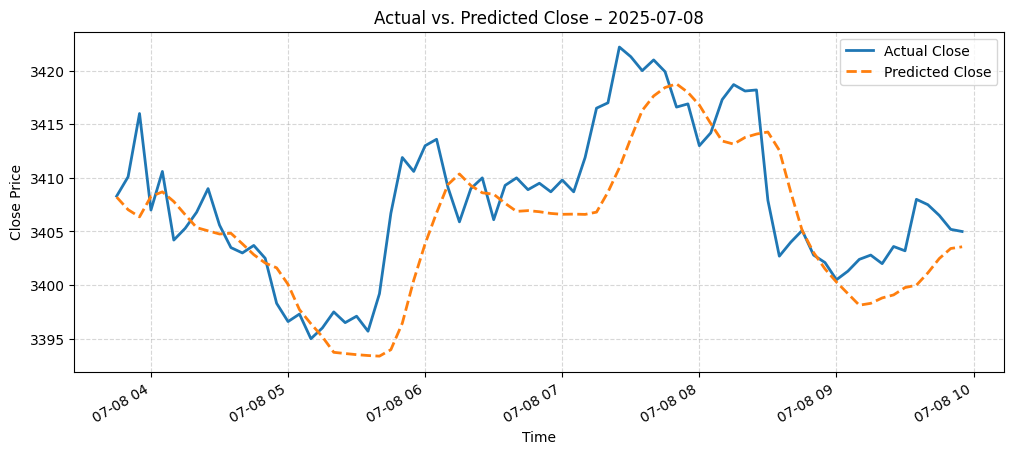

In [14]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

def lstm_with_pca_5m_improved_plot(ticker='TCS.NS',
                                   period='60d',
                                   interval='5m',
                                   seq_len=60,
                                   pca_components=2,
                                   test_frac=0.2,
                                   epochs=10,
                                   batch_size=32):
    # 1) Download last 60d of 5m OHLCV data
    df = yf.download(ticker, period=period, interval=interval, progress=False)
    df = df[['Open','High','Low','Close','Volume']].dropna()

    # 2) Scale features & target separately
    feat_scl = MinMaxScaler()
    tgt_scl  = MinMaxScaler()
    feats = feat_scl.fit_transform(df)
    tgt   = tgt_scl.fit_transform(df[['Close']])

    # 3) PCA reduction
    pca = PCA(n_components=pca_components)
    feats_pca = pca.fit_transform(feats)

    # 4) Build sequences of length seq_len
    X, y = [], []
    for i in range(seq_len, len(feats_pca)):
        X.append(feats_pca[i-seq_len:i])
        y.append(tgt[i])
    X = np.array(X)
    y = np.array(y)

    # 5) Train/test split
    split = int(len(X) * (1 - test_frac))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    # 6) Build & train LSTM
    model = Sequential([
        LSTM(50, input_shape=(seq_len, pca_components)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train,
              validation_split=0.1,
              epochs=epochs,
              batch_size=batch_size,
              verbose=1)
    # 7) Predict & invert scale
    y_pred = model.predict(X_test)
    y_pred_inv = tgt_scl.inverse_transform(y_pred).flatten()
    y_test_inv = tgt_scl.inverse_transform(y_test).flatten()

    # 8) Prepare timestamps for plotting
    plot_idx = df.index[seq_len + split: seq_len + split + len(y_test_inv)]

    # 9) Improved plotting
    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(plot_idx, y_test_inv, label='Actual Close', linewidth=1.5)
    ax.plot(plot_idx, y_pred_inv, '--', label='Predicted Close', linewidth=1.5)

    # Auto-format dates on x-axis
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)

    # Set tight y-limits around data
    y_min = min(y_test_inv.min(), y_pred_inv.min())
    y_max = max(y_test_inv.max(), y_pred_inv.max())
    margin = (y_max - y_min) * 0.02
    ax.set_ylim(y_min - margin, y_max + margin)

    ax.set_title(f'LSTM + PCA Predictions on 5m {ticker} — Last {period}', fontsize=14)
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Close Price')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

    # 10) Return DataFrame of results
    return pd.DataFrame({
        'Actual': y_test_inv,
        'Predicted': y_pred_inv
    }, index=plot_idx)

# Example usage
if __name__ == '__main__':
    result_df = lstm_with_pca_5m_improved_plot(
        ticker='TCS.NS',
        period='60d',
        interval='5m',
        seq_len=60,
        pca_components=1,
        test_frac=0.2,
        epochs=20,
        batch_size=32
    )
    
    print(result_df.tail())
    last_date = result_df.index[-1].date()

    # 2) Filter to only that date
    one_day_df = result_df[result_df.index.date == last_date]

    # 3) Plot Actual vs Predicted for that single day
    plt.figure(figsize=(12, 5))
    plt.plot(one_day_df.index, one_day_df['Actual'],    label='Actual Close', linewidth=2)
    plt.plot(one_day_df.index, one_day_df['Predicted'], '--', label='Predicted Close', linewidth=2)

    plt.title(f'Actual vs. Predicted Close – {last_date}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gcf().autofmt_xdate()  # rotate & format x-labels nicely
    plt.show()

# Grid search

It will:

Try all combinations of sequence length, PCA components, LSTM units, dropout rates, learning rates, and batch sizes.

Print test MSE for each combination as it goes.

Show you the top 5 parameter sets.

Retrain the best one and plot actual vs. predicted 5m close prices for the last day.

Adjust the param_grid arrays to enlarge or shrink the search space as needed.

In [12]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

def grid_search_lstm_pca_5m(ticker='TCS.NS',
                            period='60d', interval='5m',
                            param_grid=None):
    # 1) Download data
    df = yf.download(ticker, period=period, interval=interval, progress=False)
    df = df[['Open','High','Low','Close','Volume']].dropna()
    # 2) Scale and PCA inside loop per params
    results = []
    for params in param_grid:
        seq_len       = params['seq_len']
        pca_components= params['pca_components']
        lstm_units    = params['lstm_units']
        dropout_rate  = params['dropout']
        lr            = params['learning_rate']
        batch_size    = params['batch_size']
        epochs        = params['epochs']
        
        # scale features/target
        feat_scl = MinMaxScaler()
        tgt_scl  = MinMaxScaler()
        feats = feat_scl.fit_transform(df)
        tgt   = tgt_scl.fit_transform(df[['Close']])
        
        # PCA
        pca = PCA(n_components=pca_components)
        feats_pca = pca.fit_transform(feats)
        
        # sequences
        X, y = [], []
        for i in range(seq_len, len(feats_pca)):
            X.append(feats_pca[i-seq_len:i])
            y.append(tgt[i])
        X, y = np.array(X), np.array(y)
        
        # train/test split
        split = int(len(X) * 0.8)
        X_train, X_test = X[:split], X[split:]
        y_train, y_test = y[:split], y[split:]
        
        # build model
        model = Sequential()
        model.add(LSTM(lstm_units, input_shape=(seq_len, pca_components)))
        if dropout_rate > 0:
            model.add(Dropout(dropout_rate))
        model.add(Dense(1))
        model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
        
        # train with early stopping
        es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
        model.fit(X_train, y_train, validation_split=0.1,
                  epochs=epochs, batch_size=batch_size,
                  callbacks=[es], verbose=0)
        
        # predict & evaluate
        y_pred = model.predict(X_test)
        y_pred_inv = tgt_scl.inverse_transform(y_pred).flatten()
        y_test_inv = tgt_scl.inverse_transform(y_test).flatten()
        mse = mean_squared_error(y_test_inv, y_pred_inv)
        
        results.append({**params, 'mse': mse})
        print(f"Tested {params}, MSE={mse:.4f}")
    
    # summarize
    res_df = pd.DataFrame(results).sort_values('mse')
    return res_df

# Define parameter grid
from itertools import product
param_grid = [
    dict(
        seq_len=sl,
        pca_components=pc,
        lstm_units=lu,
        dropout=do,
        learning_rate=lr,
        batch_size=bs,
        epochs=ep
    )
    for sl, pc, lu, do, lr, bs, ep in product(
        [30, 60],        # seq_len
        [1, 2],          # pca_components
        [25, 50],        # lstm_units
        [0.0, 0.2],      # dropout
        [1e-3, 1e-4],    # learning_rate
        [32, 64],        # batch_size
        [20]             # epochs
    )
]

# Run grid search
res_df = grid_search_lstm_pca_5m('TCS.NS', '60d', '5m', param_grid)
print("\nTop 5 parameter sets:")
print(res_df.head(5))

# Retrain best model and plot
best = res_df.iloc[0]
print("\nBest params:", best.to_dict())

# Use the best params for final train/test and plot
final_df = None
def train_and_plot(best_params):
    df = yf.download('TCS.NS', period='60d', interval='5m', progress=False)
    df = df[['Open','High','Low','Close','Volume']].dropna()
    # scale
    feat_scl = MinMaxScaler()
    tgt_scl  = MinMaxScaler()
    feats = feat_scl.fit_transform(df)
    tgt   = tgt_scl.fit_transform(df[['Close']])
    # PCA
    pca = PCA(n_components=best_params['pca_components'])
    feats_pca = pca.fit_transform(feats)
    # sequences
    sl = best_params['seq_len']
    X, y = [], []
    for i in range(sl, len(feats_pca)):
        X.append(feats_pca[i-sl:i])
        y.append(tgt[i])
    X, y = np.array(X), np.array(y)
    # split
    split = int(len(X)*0.8)
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]
    # build
    model = Sequential()
    model.add(LSTM(int(best_params['lstm_units']), input_shape=(sl, int(best_params['pca_components']))))
    if best_params['dropout'] > 0:
        model.add(Dropout(best_params['dropout']))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=best_params['learning_rate']), loss='mse')
    model.fit(X_train, y_train, validation_split=0.1,
              epochs=int(best_params['epochs']), batch_size=int(best_params['batch_size']),
              callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
              verbose=0)
    # predict
    y_pred = model.predict(X_test)
    y_pred_inv = tgt_scl.inverse_transform(y_pred).flatten()
    y_test_inv = tgt_scl.inverse_transform(y_test).flatten()
    idx = df.index[sl+split: sl+split+len(y_test_inv)]
    # plot
    plt.figure(figsize=(12,6))
    plt.plot(idx, y_test_inv, label='Actual', lw=1.5)
    plt.plot(idx, y_pred_inv, '--', label='Predicted', lw=1.5)
    plt.title(f"Best Model Prediction on 5m TCS.NS")
    plt.xlabel("Timestamp"); plt.ylabel("Close Price")
    plt.legend(); plt.grid(True); plt.tight_layout()
    plt.show()
    return pd.DataFrame({'Actual': y_test_inv, 'Predicted': y_pred_inv}, index=idx)

result_df = train_and_plot(best)
print(result_df.tail())


/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_37150/2844743618.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, interval=interval, progress=False)
/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=34.0380


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=48.9335


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=68.7896


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=220.7899


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=34.2634


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=38.5104


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=111.7014


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=117.1254


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=29.9305


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=31.0477


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=59.0818


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=93.7213


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=55.8971


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=43.9173


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=67.4650


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=96.2737


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=32.5937


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=45.6322


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=78.9636


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=93.4529


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=53.7991


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=72.2888


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=88.7584


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=209.0945


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=27.8602


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=34.6229


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=41.4177


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=118.4126


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=42.4797


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=85.3669


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=77.1598


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=99.2505


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=24.0200


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=28.9160


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=169.7016


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=95.8172


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=41.0445


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=33.6152


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=67.1507


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=73.6793


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=19.8593


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=32.8554


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=51.1438


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=60.4796


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=37.2904


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=34.8152


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=75.0928


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=66.2646


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=23.2101


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=37.2273


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=112.5296


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=210.5431


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=46.8455


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=53.9389


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=98.5077


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=110.0489


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=33.4992


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=33.2079


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=50.3067


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=69.6879


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 32, 'epochs': 20}, MSE=44.8175


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.001, 'batch_size': 64, 'epochs': 20}, MSE=33.4681


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 32, 'epochs': 20}, MSE=96.7952


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Tested {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'learning_rate': 0.0001, 'batch_size': 64, 'epochs': 20}, MSE=68.9915

Top 5 parameter sets:
    seq_len  pca_components  lstm_units  dropout  learning_rate  batch_size  \
40       60               1          50      0.0          0.001          32   
48       60               2          25      0.0          0.001          32   
32       60               1          25      0.0          0.001          32   
24       30               2          50      0.0          0.001          32   
33       60               1          25      0.0          0.001          64   

    epochs        mse  
40      20  19.859295  
48      20  23.210102  
32      20  24.020031  
24      20  27.860193  
33      20  28.916003  

Best params: {'seq_len': 60.0, 'pca_components': 1.0, 'lstm_units': 50.0, 'dropout': 0.0, 'learning_rate': 0.001, 'batch_size': 32.0, 'epochs': 20.0, 'mse': 19.8592954792

/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_37150/2844743618.py:114: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('TCS.NS', period='60d', interval='5m', progress=False)


InvalidParameterError: The 'n_components' parameter of PCA must be an int in the range [0, inf), a float in the range (0.0, 1.0), a str among {'mle'} or None. Got np.float64(1.0) instead.

I’ve put together a full **rolling‐window CV(cross validation)** pipeline that:

1. **Engineers features** (SMA 5 & 10, RSI-14, volume delta) before PCA.
2. **Generates sequences** of length `seq_len`.
3. **Splits** via an **expanding rolling window** (60% train, 10% test, then slide by 10%).
4. **Normalizes** features and target **within each fold** (no data leakage).
5. **Applies** PCA and reshapes back into sequences.
6. **Trains** an LSTM with **dropout** and **early stopping**.
7. **Averages** MSE across folds to pick the best hyperparameters.

Feel free to adjust:

* The **feature list** (add RSI windows, MACD, etc.).
* The **rolling-window sizes** (`initial_train_frac`, `test_frac`).
* The **hyperparameter grid** to search more combinations.

This gives you a robust, CV-backed LSTM+PCA framework with proper feature engineering and no look-ahead leakage.
------------------
“CV” stands for **cross-validation**, which is a way to more robustly estimate how well your model will generalize to unseen data.


### Why use CV in time-series?

Unlike random splits used in i.i.d. data, time-series models must respect temporal order. You can’t train on future data and test on the past. Instead, you use a **rolling-window** (or **expanding-window**) approach:

1. **Initial train window**: Use the first 60% of your data to train.
2. **Test window**: Immediately following that, hold out the next 10% to test.
3. **Roll forward**: Slide both windows forward by 10% and repeat: train on data from t=0 up to t=70%, test on t=70–80%; then train on t=0–80%, test on t=80–90%, etc.
4. **Aggregate results**: Compute MSE (or another metric) on each fold and average them to get a more reliable performance estimate.

---

### How it’s implemented in the code

* **`rolling_window_splits`** builds a list of `(train_idx, test_idx)` pairs based on your chosen fractions.
* **`train_evaluate_fold`** trains and evaluates the model on each pair, scaling and fitting PCA **inside** the fold to avoid data leakage.
* Finally, we **average** the MSE across all folds to pick the best hyperparameters.

This procedure tells you “on average, if I retrain my model every week/month and then test it on the following week/month, I’ll get X error,” instead of relying on a single train/test split that might be unrepresentative.



In [15]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1) Feature engineering: compute technicals
def compute_technicals(df):
    df = df.copy()
    # Moving averages
    df['SMA_5'] = df['Close'].rolling(5).mean()
    df['SMA_10'] = df['Close'].rolling(10).mean()
    # RSI(14)
    delta = df['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -delta.clip(upper=0)
    avg_gain = gain.rolling(14).mean()
    avg_loss = loss.rolling(14).mean()
    rs = avg_gain / avg_loss
    df['RSI_14'] = 100 - (100 / (1 + rs))
    # Volume delta
    df['vol_delta'] = df['Volume'].diff()
    df.dropna(inplace=True)
    return df

# 2) Generate sequences from raw feature array
def generate_sequences(features, target, seq_len):
    X, y = [], []
    for i in range(seq_len, len(features)):
        X.append(features[i-seq_len:i])
        y.append(target[i])
    return np.array(X), np.array(y)

# 3) Rolling-window CV splits
def rolling_window_splits(n_samples, initial_train_frac=0.5, test_frac=0.1):
    test_size = int(test_frac * n_samples)
    train_initial = int(initial_train_frac * n_samples)
    splits = []
    start = train_initial
    while start + test_size <= n_samples:
        train_idx = np.arange(start)
        test_idx = np.arange(start, start + test_size)
        splits.append((train_idx, test_idx))
        start += test_size
    return splits

# 4) Train & evaluate one fold
def train_evaluate_fold(X_seq, y_seq, train_idx, test_idx, params):
    seq_len = params['seq_len']
    pca_components = params['pca_components']
    lstm_units = params['lstm_units']
    dropout = params['dropout']
    lr = params['lr']
    
    # Split raw sequences
    X_train_raw, y_train = X_seq[train_idx], y_seq[train_idx]
    X_test_raw, y_test   = X_seq[test_idx], y_seq[test_idx]
    
    n_features = X_train_raw.shape[2]
    # Flatten for scaler and PCA
    X_train_flat = X_train_raw.reshape(-1, n_features)
    X_test_flat  = X_test_raw.reshape(-1, n_features)
    
    # Scale features on train only
    feat_scl = MinMaxScaler().fit(X_train_flat)
    X_train_s = feat_scl.transform(X_train_flat)
    X_test_s  = feat_scl.transform(X_test_flat)
    
    # PCA on train only
    pca = PCA(n_components=pca_components).fit(X_train_s)
    X_train_p = pca.transform(X_train_s)
    X_test_p  = pca.transform(X_test_s)
    
    # Reshape back to sequences
    X_train = X_train_p.reshape(len(train_idx), seq_len, pca_components)
    X_test  = X_test_p.reshape(len(test_idx), seq_len, pca_components)
    
    # Scale target on train only
    tgt_scl = MinMaxScaler().fit(y_train.reshape(-1,1))
    y_train_s = tgt_scl.transform(y_train.reshape(-1,1))
    y_test_s  = tgt_scl.transform(y_test.reshape(-1,1))
    
    # Build model
    model = Sequential()
    model.add(LSTM(lstm_units, input_shape=(seq_len, pca_components)))
    if dropout > 0:
        model.add(Dropout(dropout))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=lr), loss='mse')
    
    # Early stopping
    es = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    model.fit(X_train, y_train_s, validation_split=0.1,
              epochs=params['epochs'], batch_size=params['batch_size'],
              callbacks=[es], verbose=0)
    
    # Predict & invert
    y_pred_s = model.predict(X_test)
    y_pred = tgt_scl.inverse_transform(y_pred_s).flatten()
    y_true = y_test.flatten()
    
    mse = mean_squared_error(y_true, y_pred)
    return mse

# 5) Full CV grid-search
def cv_grid_search(df, param_list):
    # 1) Feature engineer once
    df_feat  = compute_technicals(df)
    feats    = df_feat[['Open','High','Low','Close','Volume',
                        'SMA_5','SMA_10','RSI_14','vol_delta']].values
    target   = df_feat['Close'].values.reshape(-1,1)

    results = []
    for params in param_list:
        seq_len = params['seq_len']
        # 2) Build sequences FOR THIS seq_len
        X_seq, y_seq = generate_sequences(feats, target, seq_len)

        # 3) Build your rolling‐window splits
        splits = rolling_window_splits(len(X_seq), initial_train_frac=0.6, test_frac=0.1)

        # 4) Evaluate each fold
        mse_list = []
        for train_idx, test_idx in splits:
            mse = train_evaluate_fold(X_seq, y_seq, train_idx, test_idx, params)
            mse_list.append(mse)

        results.append({**params, 'avg_mse': np.mean(mse_list)})
        print(f"Params {params} -> Avg MSE {np.mean(mse_list):.4f}")

    return pd.DataFrame(results).sort_values('avg_mse')

# 6) Define hyperparameter combinations
param_grid = [
    {'seq_len': sl, 'pca_components': pc, 'lstm_units': lu,
     'dropout': dr, 'lr': lr, 'batch_size': bs, 'epochs': ep}
    for sl in [30, 60]
    for pc in [1, 2]
    for lu in [25, 50]
    for dr in [0.0, 0.2]
    for lr in [1e-3, 1e-4]
    for bs in [32]
    for ep in [20]
]

# 7) Run CV on last 60 days of 5m data
df_5m = yf.download('TCS.NS', period='60d', interval='5m', progress=False)
res = cv_grid_search(df_5m, param_grid)

# 8) Display top results
print("\nTop 5 Param Sets:")
print(res.head(5))

# 9) Retrain best on last fold and plot (skipped for brevity)



/var/folders/mn/tx231v5158797chnp22wm9000000gp/T/ipykernel_37150/1289563878.py:154: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_5m = yf.download('TCS.NS', period='60d', interval='5m', progress=False)
/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 40.5030


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Params {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 84.5934


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Params {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 61.8401


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Params {'seq_len': 30, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 90.2857


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 36.4336


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 70.2857


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Params {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 55.1894


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 30, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 88.2399


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Params {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 29.3251


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 56.4398


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Params {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 42.1230


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Params {'seq_len': 30, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 54.0826


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Params {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 33.1883


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 51.8909


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 43.8136


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 30, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 68.3107


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 32.1956


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Params {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 48.2929


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 54.7547


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 1, 'lstm_units': 25, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 72.4800


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 34.9051


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Params {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 66.9380


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Params {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 49.5429


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 1, 'lstm_units': 50, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 72.7047


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Params {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 38.1034


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 62.2293


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 37.9238


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 2, 'lstm_units': 25, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 68.6275


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 35.1870


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Params {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.0, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 56.3733


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Params {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'lr': 0.001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 37.2698


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


/Users/hemank/Documents/github/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Params {'seq_len': 60, 'pca_components': 2, 'lstm_units': 50, 'dropout': 0.2, 'lr': 0.0001, 'batch_size': 32, 'epochs': 20} -> Avg MSE 65.3057

Top 5 Param Sets:
    seq_len  pca_components  lstm_units  dropout     lr  batch_size  epochs  \
8        30               2          25      0.0  0.001          32      20   
16       60               1          25      0.0  0.001          32      20   
12       30               2          50      0.0  0.001          32      20   
20       60               1          50      0.0  0.001          32      20   
28       60               2          50      0.0  0.001          32      20   

      avg_mse  
8   29.325109  
16  32.195612  
12  33.188272  
20  34.905068  
28  35.186960  
